# pkpd-tutorial
## Whole-body PKPD model for caffeine
PKPD model for clearance of caffeine by the human liver.

* Caffeine and the primary metabolite paraxanthine are removed from the blood stream by hepatic or renal clearance.
* Caffeine can be given either as intra-venous injection or by oral dose in the model
* The model is used to analyse the effect of smoking on caffeine clearance

This notebook demonstrates some simple use cases of a PKPD model for caffeine in Human.

* the ODE equations were generate directly from the SBML of the caffeine model
* initial values `X0`, parameter values `pars`, and the ODE system `dxdt` are defined in the `caffeine.py`

![Fig.1 Caffeine PKPD Model](figures/caffeine_pkpd.png)

This tutorial works in a minimal python environment with

* `numpy`
* `scipy`
* `matplotlib`

For questions contact konigmatt@googlemail.com. The latest version of the resources are available from https://github.com/matthiaskoenig/pkpd-tutorial with 

* [notebooks/caffeine.py](https://github.com/matthiaskoenig/pkpd-tutorial/blob/master/notebooks/caffeine.py) 
* [notebooks/pkpd-tutorial.ipynb](https://github.com/matthiaskoenig/pkpd-tutorial/blob/master/notebooks/pkpd-tutorial.ipynb)

In [1]:
# general imports for ode integration
from __future__ import print_function
import numpy as np
import scipy
from matplotlib import pylab as plt
from scipy.integrate import odeint

# global settings for plots
plt.rcParams.update({
        'axes.labelsize': 'large', 
        'axes.labelweight': 'bold',
        'axes.titlesize': 'large',
        'axes.titleweight': 'bold',
        'legend.fontsize': 'small',
        'xtick.labelsize': 'large',
        'ytick.labelsize': 'large',
    })

## Import the caffeine model
* initial values `X0`, parameter values `p`, assigned variables `y` and the ODE system `dxdt` are defined in `caffeine.py` 
* names for the `x`, `p`, `y` and `dxdt` are defined in `caffeine.py`

In [2]:
from caffeine import *
from pprint import pprint

# load the names
p_names, y_names, x_names, dx_names = names_caffeine()

# display the x-variable names of the ODE
# pprint(x_names)

## Example simulation
By default the model simulates a 100 [mg] oral dose (p.o) of caffeine. 
In a first step we perform this simulation and look at some state variables of the model.

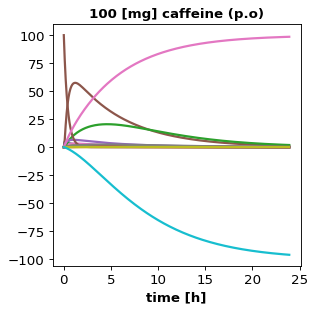

In [3]:
from caffeine import *
T = np.arange(0, 24, 0.1)
X0 = X0_caffeine()
pars = p_caffeine()
dxdt = dxdt_caffeine
X = odeint(dxdt, X0, T, args=(pars, ))

f1, ax1 = plt.subplots(1, 1, figsize=(4,4), dpi=80)
ax1.plot(T, X, linewidth=2)
ax1.set_title('100 [mg] caffeine (p.o)')
ax1.set_xlabel('time [h]')
plt.show()

## Plot amounts
Now we plot the amounts of caffeine and paraxanthine in the venous blood and liver.

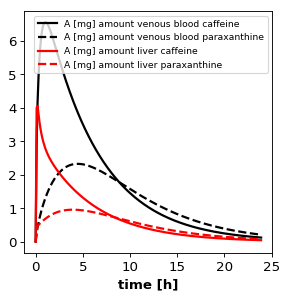

In [4]:
# plot caffeine and paraxanthine amounts
f1, ax1 = plt.subplots(1, 1, figsize=(4,4), dpi=80)

# venous blood amounts
ax1.plot(T, X[:,14], color='black', linewidth=2, label=x_names[14])
ax1.plot(T, X[:,17], color='black', linewidth=2, label=x_names[17], 
         linestyle='--')
# liver blood amounts
ax1.plot(T, X[:,2], color='red', linewidth=2, label=x_names[2])
ax1.plot(T, X[:,9], color='red', linewidth=2, label=x_names[9], 
         linestyle='--')

ax1.set_xlabel('time [h]')
ax1.legend()

plt.show()

In [5]:
# to lookup the indices you can do for instance
# dict(zip(x_names, range(len(x_names))))

## Plot concentrations
The concentrations are derived/calculated values from the ode system. All calculated values, 
not being state variables are available in `y`.

In [6]:
# y names
# dict(zip(y_names, range(len(y_names))))

In [5]:
# first we have to calculate the y values
Y = Y_caffeine(X, pars)

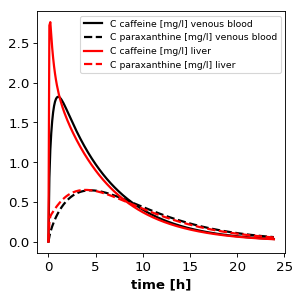

In [6]:
# plot caffeine and paraxanthine concentrations
f1, ax1 = plt.subplots(1, 1, figsize=(4,4), dpi=80)

# venous blood concentrations
ax1.plot(T, Y[:,27], color='black', linewidth=2, label=y_names[27])
ax1.plot(T, Y[:,35], color='black', linewidth=2, label=y_names[35], 
         linestyle='--')
# liver blood amounts
ax1.plot(T, Y[:,23], color='red', linewidth=2, label=y_names[23])
ax1.plot(T, Y[:,31], color='red', linewidth=2, label=y_names[31], 
         linestyle='--')

ax1.set_xlabel('time [h]')
ax1.legend()

plt.show()

# Exercises
## E1 Your caffeine level
The first exercise is to calculate the timecourse of the expected venous caffeine level after you drink some caffeinated beverage. To estimate your oral dose of caffeine you can estimate the caffeine content from the following chart

![Fig.2 Caffeine Content of Beverages](figures/caffeine_levels.jpg)

The oral dose is defined in the model via parameter `p[31] = 100` [mg]. In addition you can also adjust the bodyweight to get a more realistic estimation via the parameter `p[0] = 70` [kg].

* What would be your level of caffeine now, if you had two cups of coffee for breakfast this morning?
* How would your time course and level of caffeine look if you would take the same amount of caffeine intravenously (I.V)? (Hint: you have to set the oral dose to 0 and set the respective i.v. dose)
* What is the peak time of caffeine in venous blood? What is the peak concentration?

## E2 Interindividual variability
We saw that there is a large variability in caffeine kinetics in the population. Depending on if you are a fast or slow metabolizer of caffeine the timecourses can look very different. In E1 you calculated the mean timecourse for the population. Now we will look at the interindividual differences.

Your caffeine clearance by the liver depends on the activity of CYP1A2 in the liver, the main enzyme metabolizing caffeine. The activity is defined via the apparent clearance caffeine by hepatic microsomes `p[43] = 2` [mul/min/mg].

* How would your time course / level of caffeine change if you are a slow metabolizer (small apparent clearance), or if you are a fast metabolizer (large apperent clearance)?
* Simulate the effect of lifestyle changes on your caffeine clearance via adjusting the caffeine clearance accordinly. For instance simulate changes in your coffee intake or smoking habit. An overview over the changes in apparent clearance are given in Tab.1. 
* How would your caffeine timecourse change if you smoke >20 cigarettes per day and drink 1 liter of coffee (the effects are additive) compared to being abstinent?

![Tab.1 Lifestyle Effects](figures/Tantcheva-Poor1999_Tab4.png)